# Watcha 분석

In [1111]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import os


# 파일관련 변수
DIR='./Data/Naver/'

# Matplotlib 한글 Fonts 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../EXAM_PANDAS/Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## 1. 장르마다 성별 데이터

### 1) 데이터 전처리

In [1112]:
# 파일 불러오기
movie_f=pd.read_excel(DIR+'datalab_female_movie.xlsx',skiprows=6) # 영화_여자
movie_m=pd.read_excel(DIR+'datalab_male_movie.xlsx',skiprows=6)   # 영화_남자

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [1113]:
movie_f.info(), movie_f.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [1114]:
movie_m.info(), movie_m.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [1115]:
# DF에 YMD추가, YM그룹화 함수설정

def Year_Month(df1):
    df1_Date=df1['날짜'].str.split('-',expand=True)
    df1=pd.concat([df1_Date,df1],axis=1)
    df1.rename(columns={0:'Y',1:'M',2:'D'},inplace=True)
    df1_Group=df1.groupby(['Y','M'])
    return df1_Group

In [1172]:
movie_m

날짜        왓챠
0     2019-01-01  71.25644
1     2019-01-02  40.62377
2     2019-01-03  38.65465
3     2019-01-04  46.80493
4     2019-01-05  65.74567
...          ...       ...
1272  2022-06-26  36.72071
1273  2022-06-27  26.18198
1274  2022-06-28  24.92809
1275  2022-06-29  28.48974
1276  2022-06-30  27.92556

[1277 rows x 2 columns]

In [1197]:
Year_Month(movie_m).mean()

왓챠
Y    M            
2019 01  49.025494
     02  50.352435
     03  44.518411
     04  39.557133
     05  37.310034
     06  39.696799
     07  44.266401
     08  51.088454
     09  55.487148
     10  46.849734
     11  45.626997
     12  51.282706
2020 01  53.908824
     02  40.286001
     03  25.126261
     04  18.809790
     05  18.481508
     06  23.175293
     07  27.284735
     08  31.871000
     09  23.489823
     10  26.832420
     11  23.536171
     12  16.019653
2021 01  13.897735
     02  18.036437
     03  15.903203
     04  16.321830
     05  19.487704
     06  22.013757
     07  26.918545
     08  28.450496
     09  25.993369
     10  22.387033
     11  25.591223
     12  22.211825
2022 01  23.065105
     02  22.347134
     03  21.535867
     04  25.501193
     05  26.417838
     06  31.238916

### 2) 그래프 그리기

#### (1) 영화

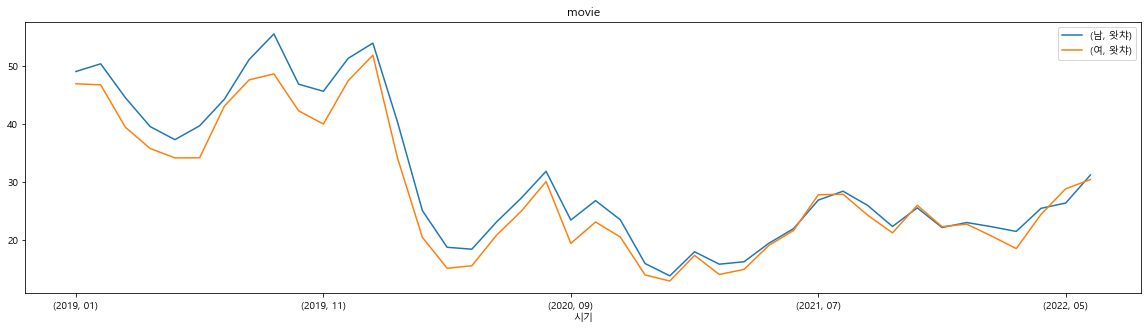

In [1116]:
movie=pd.concat([Year_Month(movie_m).mean(),Year_Month(movie_f).mean()],keys=['남','여'],axis=1)
movie.plot(figsize=(20,5),title='movie',xlabel='시기').legend()
# h,l=axes.get_legend_handles_labels()
# h,l
# Year_Month(movie_m).mean().plot(figsize=(20,5)) #남자영화
# Year_Month(movie_f).mean().plot(figsize=(20,5)) #여자영화

In [1117]:
Year_Month(movie_m).mean()

왓챠
Y    M            
2019 01  49.025494
     02  50.352435
     03  44.518411
     04  39.557133
     05  37.310034
     06  39.696799
     07  44.266401
     08  51.088454
     09  55.487148
     10  46.849734
     11  45.626997
     12  51.282706
2020 01  53.908824
     02  40.286001
     03  25.126261
     04  18.809790
     05  18.481508
     06  23.175293
     07  27.284735
     08  31.871000
     09  23.489823
     10  26.832420
     11  23.536171
     12  16.019653
2021 01  13.897735
     02  18.036437
     03  15.903203
     04  16.321830
     05  19.487704
     06  22.013757
     07  26.918545
     08  28.450496
     09  25.993369
     10  22.387033
     11  25.591223
     12  22.211825
2022 01  23.065105
     02  22.347134
     03  21.535867
     04  25.501193
     05  26.417838
     06  31.238916

In [1118]:
# 19년 3월 - 요금제 인상
#  19년 9월 - 추석
# 19년 12월,1월 - 프리미엄요금제출시

In [1119]:
# 20년 8월 - 추석?

In [1120]:
# 21년 8월 - 추석?

#### (2) 드라마

In [1121]:
# 파일 불러오기
drama_f=pd.read_excel(DIR+'datalab_female_drama.xlsx',skiprows=6) 
drama_m=pd.read_excel(DIR+'datalab_male_drama.xlsx',skiprows=6) 

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


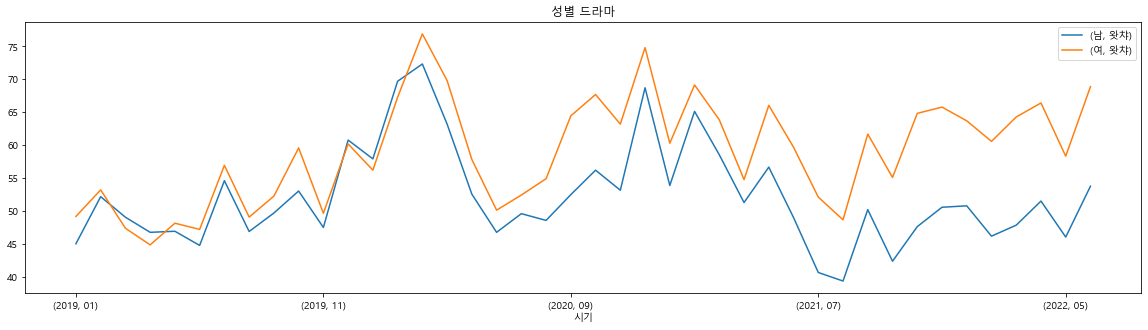

In [1122]:
drama=pd.concat([Year_Month(drama_m).mean(),Year_Month(drama_f).mean()],keys=['남','여'],axis=1)
drama.plot(figsize=(20,5),title='성별 드라마',xlabel='시기').legend()

In [1123]:
Year_Month(drama_m).mean()

왓챠
Y    M            
2019 01  45.053794
     02  52.197506
     03  49.079411
     04  46.787847
     05  46.949483
     06  44.803289
     07  54.620771
     08  46.914687
     09  49.718459
     10  53.054857
     11  47.527482
     12  60.788591
2020 01  57.934031
     02  69.712719
     03  72.333116
     04  63.213748
     05  52.582488
     06  46.786082
     07  49.619505
     08  48.596792
     09  52.506375
     10  56.217132
     11  53.177472
     12  68.724103
2021 01  53.897229
     02  65.138883
     03  58.556607
     04  51.308642
     05  56.682822
     06  49.031471
     07  40.691259
     08  39.397798
     09  50.233699
     10  42.397130
     11  47.650113
     12  50.594222
2022 01  50.807651
     02  46.206373
     03  47.876666
     04  51.531272
     05  46.067655
     06  53.785970

In [1124]:
# 20년 3월 코로나19 확진자·자가격리자에 1개월 무료 이용권 제공
# 20년 12월( 해리포터 전시리즈 공개,크리스마스?)

#### (3) 예능

In [1125]:
# 파일 불러오기
ent_f=pd.read_excel(DIR+'datalab_female_ent.xlsx',skiprows=6) 
ent_m=pd.read_excel(DIR+'datalab_male_ent.xlsx',skiprows=6) 

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


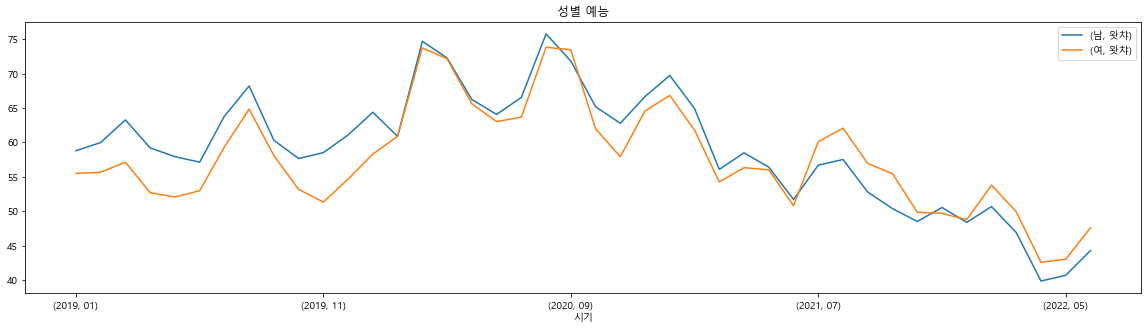

In [1126]:
ent=pd.concat([Year_Month(ent_m).mean(),Year_Month(ent_f).mean()],keys=['남','여'],axis=1)
ent.plot(figsize=(20,5),title='성별 예능',xlabel='시기').legend()

In [1127]:
Year_Month(ent_m).mean()

왓챠
Y    M            
2019 01  58.782683
     02  59.974636
     03  63.263500
     04  59.196248
     05  57.918969
     06  57.125242
     07  63.805111
     08  68.183331
     09  60.293387
     10  57.649355
     11  58.513308
     12  61.073196
2020 01  64.375353
     02  60.865125
     03  74.687435
     04  72.253446
     05  66.229237
     06  64.055715
     07  66.525095
     08  75.753955
     09  71.812125
     10  65.174647
     11  62.766267
     12  66.663480
2021 01  69.724657
     02  64.911765
     03  56.074628
     04  58.471395
     05  56.401503
     06  51.698713
     07  56.687817
     08  57.506198
     09  52.773664
     10  50.367431
     11  48.503447
     12  50.536834
2022 01  48.375163
     02  50.665675
     03  46.893486
     04  39.849600
     05  40.680468
     06  44.280074

In [1128]:
# 20년 3월 코로나19 확진자·자가격리자에 1개월 무료 이용권 제공
# 20년 8월 런닝맨공개, 3일연휴광복절

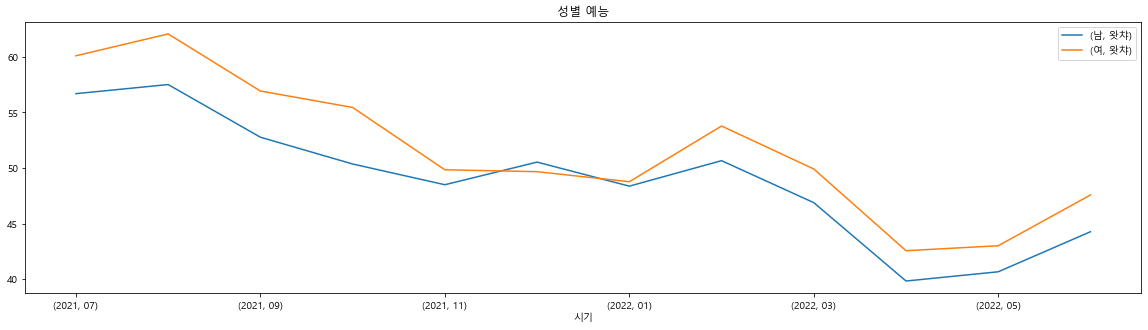

In [1129]:
ent=pd.concat([Year_Month(ent_m).mean(),Year_Month(ent_f).mean()],keys=['남','여'],axis=1)
ent.iloc[30:].plot(figsize=(20,5),title='성별 예능',xlabel='시기').legend()

#### (4) 애니메이션

In [1130]:
# 파일 불러오기
ani_f=pd.read_excel(DIR+'datalab_female_animation.xlsx',skiprows=6) 
ani_m=pd.read_excel(DIR+'datalab_male_animation.xlsx',skiprows=6) 

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [1131]:
ani_f

날짜         왓챠
0     2019-01-01  100.00000
1     2019-01-02   79.96702
2     2019-01-03   79.38994
3     2019-01-04   82.76999
4     2019-01-05   82.93487
...          ...        ...
1272  2022-06-26   39.65375
1273  2022-06-27   40.23083
1274  2022-06-28   37.26298
1275  2022-06-29   39.81863
1276  2022-06-30   40.47815

[1277 rows x 2 columns]

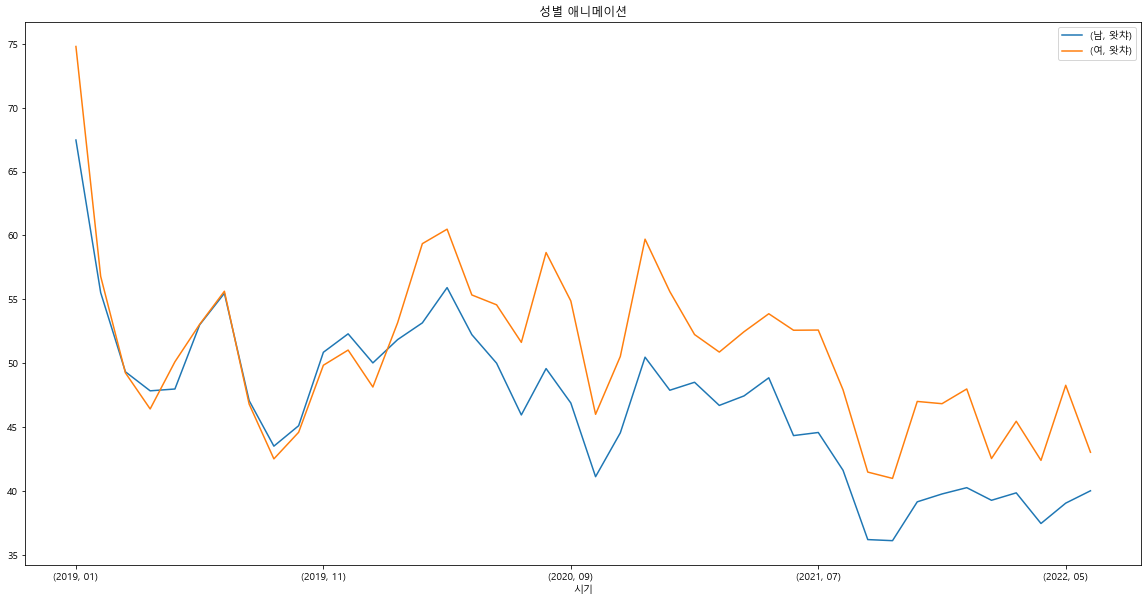

In [1132]:
ani=pd.concat([Year_Month(ani_m).mean(),Year_Month(ani_f).mean()],keys=['남','여'],axis=1)
ani.plot(figsize=(20,10),title='성별 애니메이션',xlabel='시기').legend()

In [1133]:
Year_Month(ani_f).mean()

왓챠
Y    M            
2019 01  74.789242
     02  56.795425
     03  49.243406
     04  46.419341
     05  50.110359
     06  53.042040
     07  55.631194
     08  46.799452
     09  42.511674
     10  44.592182
     11  49.840611
     12  51.027839
2020 01  48.137112
     02  53.165416
     03  59.356961
     04  60.489140
     05  55.341324
     06  54.569932
     07  51.631514
     08  58.662868
     09  54.869464
     10  45.998984
     11  50.530361
     12  59.707997
2021 01  55.607260
     02  52.243546
     03  50.870936
     04  52.464958
     05  53.870697
     06  52.580374
     07  52.594203
     08  47.919043
     09  41.478424
     10  40.983428
     11  47.007414
     12  46.831365
2022 01  47.982868
     02  42.539154
     03  45.456475
     04  42.396257
     05  48.272739
     06  43.031047

In [1134]:
# 21년 12,1월,2월 무한열차

## 2. 연령대별 플랫폼 이용 추이 데이터

In [1161]:
files=os.listdir(DIR+'연령별/')
files

['datalab_all_18세이하.xlsx',
 'datalab_all_20대.xlsx',
 'datalab_all_30대.xlsx',
 'datalab_all_40대.xlsx',
 'datalab_all_50대.xlsx',
 'datalab_all_60대이상.xlsx']

In [1162]:
# file_list=[]
# for i in files:
#     file=pd.read_excel(DIR+'연령별/'+i,skiprows=6)
#     file_list.append(file)
# file_list
# age_list=['age_18','age_20','age_30','age_40','age_50','age_60']
# age_list=file_list
# age_18
# age_All=pd.concat(file_list,axis=1,keys=age_list)
# age_All

In [1163]:
# age18=pd.concat([Year_Month(age_18).mean(),Year_Month(ent_f).mean()],keys=['남','여'],axis=1)
# ent.plot(figsize=(20,5),title='성별 예능',xlabel='시기').legend()

<AxesSubplot:title={'center':'18세이하'}, xlabel='시기'>

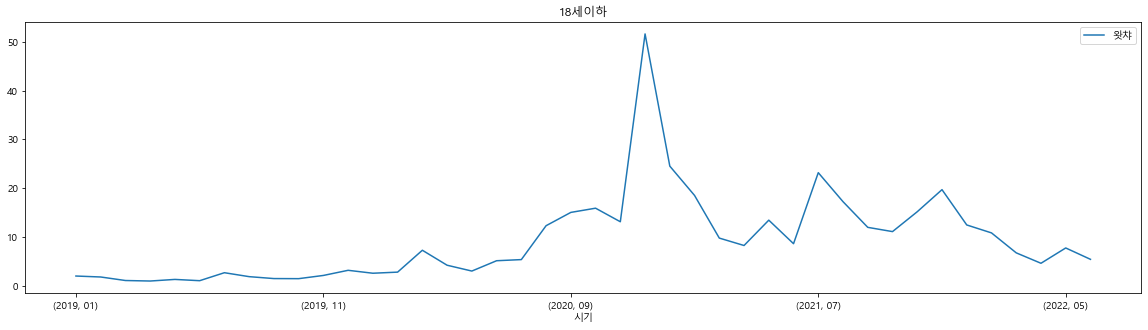

In [1164]:
age_18.plot(figsize=(20,5),title='18세이하',xlabel='시기')

<AxesSubplot:title={'center':'20대'}, xlabel='시기'>

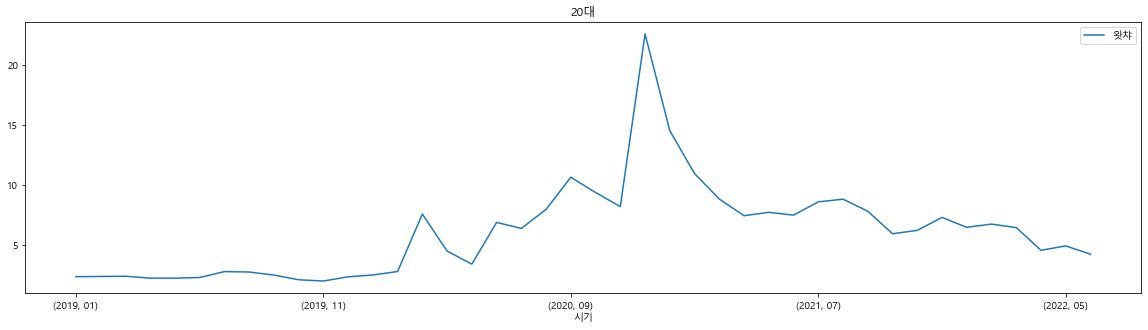

In [1165]:
age_20.plot(figsize=(20,5),title='20대',xlabel='시기')

<AxesSubplot:title={'center':'30대'}, xlabel='시기'>

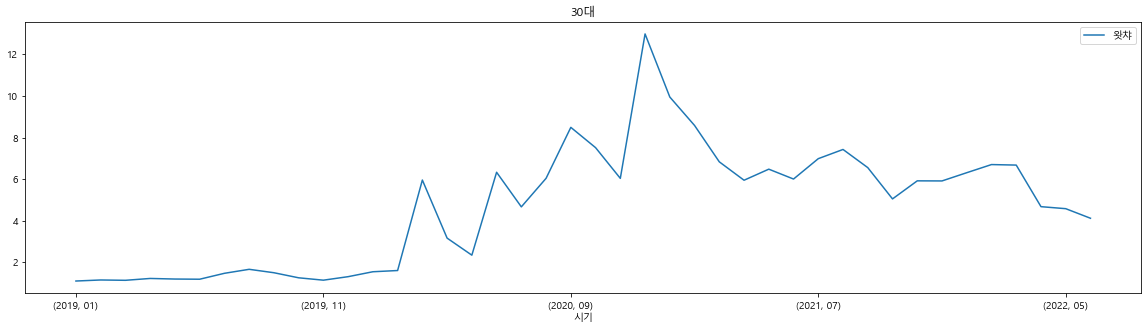

In [1166]:
age_30.plot(figsize=(20,5),title='30대',xlabel='시기')

<AxesSubplot:title={'center':'40대'}, xlabel='시기'>

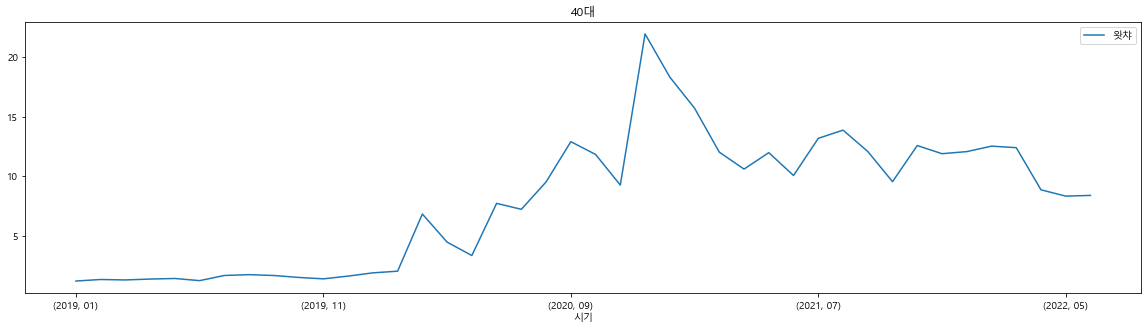

In [1167]:
age_40.plot(figsize=(20,5),title='40대',xlabel='시기')

<AxesSubplot:title={'center':'50대'}, xlabel='시기'>

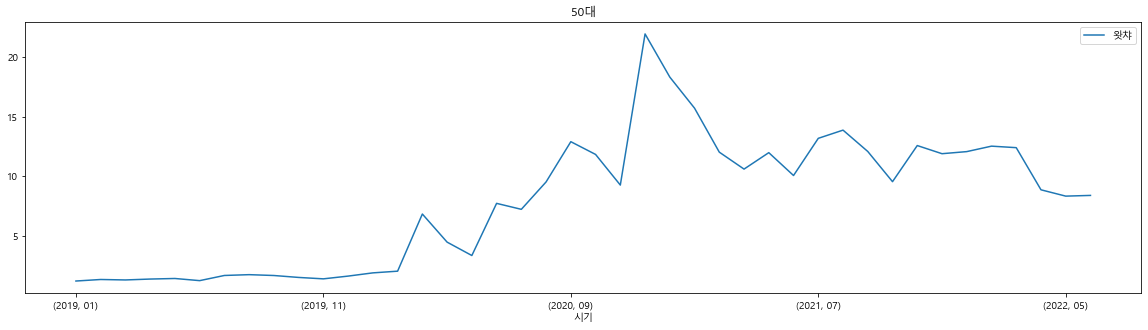

In [1168]:
age_50.plot(figsize=(20,5),title='50대',xlabel='시기')

<AxesSubplot:title={'center':'60대이상'}, xlabel='시기'>

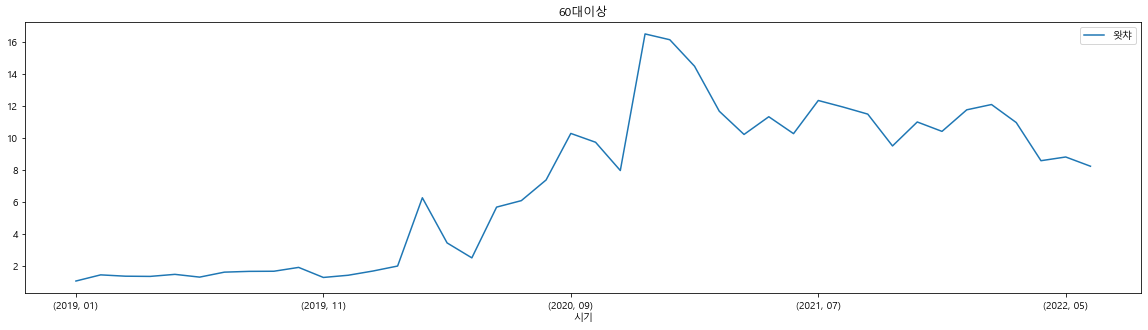

In [1169]:
age_60.plot(figsize=(20,5),title='60대이상',xlabel='시기')

In [1170]:
# age_18=Year_Month(age_18).mean()
# age_18.plot(figsize=(20,5),title='18세',xlabel='시기')

In [1171]:
# age_20=Year_Month(age_All['20']).mean()
# age_20.plot(figsize=(20,5),title='20대',xlabel='시기')

In [1146]:
# age_18=Year_Month(age_All['18']).mean()
# age_20=Year_Month(age_All['20']).mean()
# age_18.plot(figsize=(20,5),title='18세이하',xlabel='시기')
# age_20.plot(figsize=(20,5),title='18세이하',xlabel='시기')

In [1147]:
# age_18=Year_Month(age_All['18']).mean()
# age_20=Year_Month(age_All['20']).mean()
# age_18.plot(figsize=(20,5),title='18세이하',xlabel='시기')
# age_20.plot(figsize=(20,5),title='18세이하',xlabel='시기')

In [1148]:
# age=pd.concat([Year_Month(age_All['18']).mean(),Year_Month(age_All['20']).mean()],keys=['18','20'],axis=1)
# age.plot(figsize=(20,5),title='18,20',xlabel='시기').legend()

In [1149]:
# age_18=Year_Month(age_All['18']).mean()
# age_20=Year_Month(age_All['20']).mean()
# age_30=Year_Month(age_All['30']).mean()
# age_40=Year_Month(age_All['40']).mean()
# age_50=Year_Month(age_All['50']).mean()
# age_60=Year_Month(age_All['60']).mean()
# age=pd.concat([age_18,age_20,age_30,age_40,age_50,age_60],axis=1,keys=['18','20','30','40','50','60'])
# age.plot(figsize=(20,5),title='18,20',xlabel='시기').legend()

In [1150]:
# age_All.plot(figsize=(20,5),title='18,20',xlabel='시기').legend()

## 3. 분석 내용

## 4. stp?